<a href="https://colab.research.google.com/github/cameronmcewan/group-4-frontend/blob/data-analytics/Markowitz_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mplfinance

     |████████████████████████████████| 70 kB 3.1 MB/s 


In [ ]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
#from statsmodels.tsa.ar_model import AutoReg, ar_select_order

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
risk_free_rate = 0.0125

In [ ]:
data = pd.read_csv('crypto_data_cleaned.csv' ,index_col=0)

In [ ]:
dt_n = (data-data.min())/(data.max()-data.min())

Plot Growth of Investments over Total Dataset

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f408a6cfd90> has a label of '_ADAUSDT_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f408a66f4d0> has a label of '_BTCUSDT_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f408a66fa90> has a label of '_TRXUSDT_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 

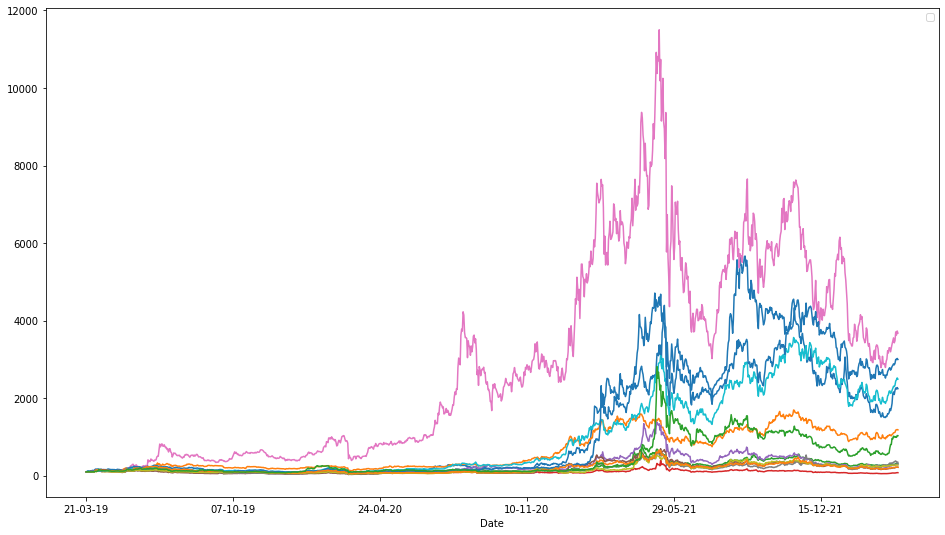

In [ ]:
(data / data.iloc[0] * 100).plot(figsize=(16, 9))

In [ ]:
#List of all the coin names
port_list = []
 
    # loop to iterate through the rows of csv
for row in data:
 
        # adding the first row
        port_list.append(row)
 
        # breaking the loop after the
        # first iteration itself
        #break
 
# printing the result
print("List of column names : ",
      port_list)

List of column names :  ['_ADAUSDT_', '_BTCUSDT_', '_TRXUSDT_', '_EOSUSDT_', '_NEOUSDT_', '_XLMUSDT_', '_LINKUSDT_', '_ZECUSDT_', '_XRPUSDT_', '_ETHUSDT_', '_BNBUSDT_', '_LTCUSDT_', '_ETCUSDT_']


Markowitz Portfolio Optimization

In this algorithms we can create a portfolio that optimizes return while also minimizing risk. 
\begin{equation}
w_{1} r_{1}+w_{2} r_{2}=r_{p}
\end{equation}


We do this by creating portfolios with cryptocurrencies that are not correlated. We want to calculate expected returns by analyzing the returns of each cryptocurreny multiplied by its weight.
\begin{equation}
\left(w_{1} \sigma_{1}+w_{2} \sigma_{2}\right)^{2}=w_{1}^{2} \sigma_{1}^{2}+2 w_{1} \sigma_{1} w_{2} \sigma_{2} \rho_{1}+w_{2}^{2} \sigma_{2}^{2}
\end{equation}

Mean Returns

In [ ]:
returns = np.log(data / data.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

_ADAUSDT_     0.709493
_BTCUSDT_     0.563493
_TRXUSDT_     0.257433
_EOSUSDT_    -0.055007
_NEOUSDT_     0.247170
_XLMUSDT_     0.177850
_LINKUSDT_    0.822159
_ZECUSDT_     0.283334
_XRPUSDT_     0.230019
_ETHUSDT_     0.733331
_BNBUSDT_     0.775481
_LTCUSDT_     0.179123
_ETCUSDT_     0.532595
dtype: float64

Covarience

In [ ]:
returns.cov() * 252

,_ADAUSDT_,_BTCUSDT_,_TRXUSDT_,_EOSUSDT_,_NEOUSDT_,_XLMUSDT_,_LINKUSDT_,_ZECUSDT_,_XRPUSDT_,_ETHUSDT_,_BNBUSDT_,_LTCUSDT_,_ETCUSDT_
_ADAUSDT_,0.883113,0.409914,0.585978,0.665347,0.640247,0.681721,0.651924,0.606624,0.568326,0.577094,0.546359,0.603081,0.600197
_BTCUSDT_,0.409914,0.418807,0.402822,0.462696,0.455598,0.403692,0.435460,0.429235,0.380858,0.436990,0.402880,0.453086,0.417339
_TRXUSDT_,0.585978,0.402822,0.823076,0.691754,0.667643,0.611997,0.611690,0.605481,0.608351,0.559454,0.539339,0.587693,0.622740
_EOSUSDT_,0.665347,0.462696,0.691754,0.971223,0.751978,0.714667,0.718609,0.697010,0.694765,0.624643,0.605683,0.713237,0.761121
_NEOUSDT_,0.640247,0.455598,0.667643,0.751978,0.945005,0.663156,0.726839,0.700459,0.639803,0.608435,0.613961,0.659085,0.702921
_XLMUSDT_,0.681721,0.403692,0.611997,0.714667,0.663156,0.916986,0.666342,0.634346,0.710573,0.561642,0.537035,0.601942,0.633271
_LINKUSDT_,0.651924,0.435460,0.611690,0.718609,0.726839,0.666342,1.221576,0.668325,0.616673,0.644447,0.609071,0.642759,0.642919
_ZECUSDT_,0.606624,0.429235,0.605481,0.697010,0.700459,0.634346,0.668325,0.992066,0.607352,0.589601,0.591885,0.648925,0.690218
_XRPUSDT_,0.568326,0.380858,0.608351,0.694765,0.639803,0.710573,0.616673,0.607352,0.977341,0.526977,0.517612,0.590100,0.591257
_ETHUSDT_,0.577094,0.436990,0.559454,0.624643,0.608435,0.561642,0.644447,0.589601,0.526977,0.668412,0.540450,0.598351,0.587441


Correlation

In [ ]:
returns.corr()

,_ADAUSDT_,_BTCUSDT_,_TRXUSDT_,_EOSUSDT_,_NEOUSDT_,_XLMUSDT_,_LINKUSDT_,_ZECUSDT_,_XRPUSDT_,_ETHUSDT_,_BNBUSDT_,_LTCUSDT_,_ETCUSDT_
_ADAUSDT_,1.000000,0.674027,0.687311,0.718423,0.700846,0.757560,0.627666,0.648099,0.611739,0.751132,0.633938,0.732405,0.646821
_BTCUSDT_,0.674027,1.000000,0.686098,0.725486,0.724199,0.651421,0.608809,0.665913,0.595296,0.825927,0.678806,0.799018,0.653100
_TRXUSDT_,0.687311,0.686098,1.000000,0.773699,0.757020,0.704446,0.610030,0.670055,0.678284,0.754262,0.648214,0.739289,0.695160
_EOSUSDT_,0.718423,0.725486,0.773699,1.000000,0.784926,0.757291,0.659740,0.710083,0.713108,0.775264,0.670136,0.825959,0.782155
_NEOUSDT_,0.700846,0.724199,0.757020,0.784926,1.000000,0.712389,0.676489,0.723428,0.665743,0.765553,0.688654,0.773763,0.732298
_XLMUSDT_,0.757560,0.651421,0.704446,0.757291,0.712389,1.000000,0.629587,0.665081,0.750593,0.717391,0.611502,0.717393,0.669741
_LINKUSDT_,0.627666,0.608809,0.610030,0.659740,0.676489,0.629587,1.000000,0.607095,0.564380,0.713189,0.600875,0.663700,0.589108
_ZECUSDT_,0.648099,0.665913,0.670055,0.710083,0.723428,0.665081,0.607095,1.000000,0.616804,0.724045,0.647954,0.743546,0.701802
_XRPUSDT_,0.611739,0.595296,0.678284,0.713108,0.665743,0.750593,0.564380,0.616804,1.000000,0.651998,0.570898,0.681218,0.605692
_ETHUSDT_,0.751132,0.825927,0.754262,0.775264,0.765553,0.717391,0.713189,0.724045,0.651998,1.000000,0.720792,0.835252,0.727680


Generate Random Weights Equal to 1

In [ ]:
# Generate 13 random values that sum to 1
weights = np.random.random(13)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [3.69937462e-02 1.14879926e-02 1.18244192e-01 7.21838840e-02
 8.01385620e-02 1.33696790e-01 1.19922829e-01 1.31796861e-01
 4.00078654e-02 7.04504877e-02 3.22706867e-06 1.34928225e-01
 5.01453390e-02]
Total Weight : 1.0


Calculating Return of Portfolio

In [ ]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252

0.3504580693543168

Calculating Volatility

In [ ]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.816951476775497

Analyzing Returns & Risks of 10000 Combinations

In [ ]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(13)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.38041662, 0.38027769, 0.42801898, ..., 0.41496547, 0.41778772,
        0.43704728]),
 array([0.81504866, 0.81339593, 0.77358441, ..., 0.79960335, 0.79763215,
        0.79959582]),
 array([0.45140449, 0.45215089, 0.53713464, ..., 0.5033314 , 0.50811357,
        0.53095235]),
 array([[0.05199018, 0.00978249, 0.12237651, ..., 0.05142288, 0.00118128,
         0.08714998],
        [0.02425028, 0.00164897, 0.06010527, ..., 0.06902246, 0.06342727,
         0.08781762],
        [0.07980871, 0.13866727, 0.06459263, ..., 0.10122335, 0.05485075,
         0.02638032],
        ...,
        [0.16452497, 0.07747051, 0.03201244, ..., 0.04050466, 0.1633507 ,
         0.12363317],
        [0.14849888, 0.06821698, 0.05917424, ..., 0.02009537, 0.02121261,
         0.0813959 ],
        [0.09669292, 0.08256135, 0.03001751, ..., 0.0425467 , 0.09336707,
         0.11890721]]))

Plotting the Efficient Frontier

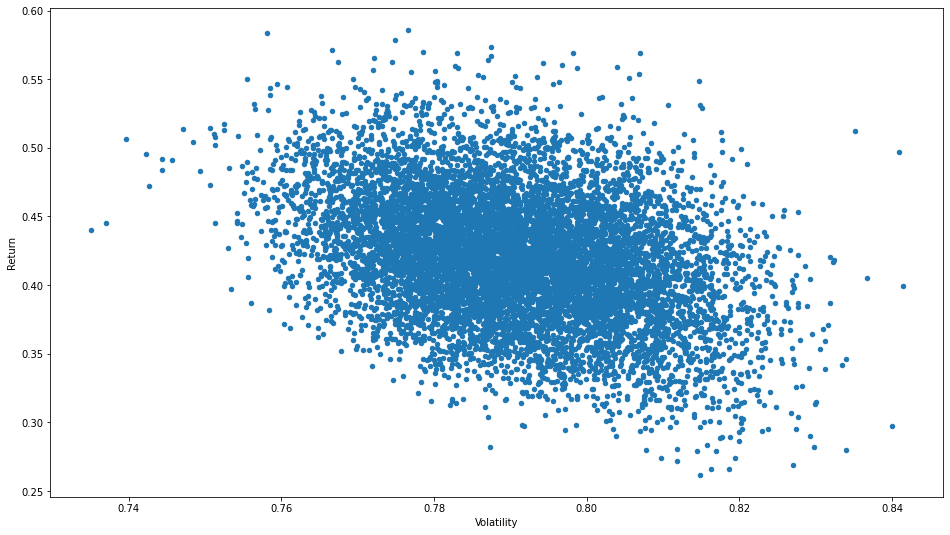

In [ ]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

In [ ]:
p_vol

array([0.81504866, 0.81339593, 0.77358441, ..., 0.79960335, 0.79763215,
       0.79959582])

In [ ]:
port_list

['_ADAUSDT_',
 '_BTCUSDT_',
 '_TRXUSDT_',
 '_EOSUSDT_',
 '_NEOUSDT_',
 '_XLMUSDT_',
 '_LINKUSDT_',
 '_ZECUSDT_',
 '_XRPUSDT_',
 '_ETHUSDT_',
 '_BNBUSDT_',
 '_LTCUSDT_',
 '_ETCUSDT_']

Sharpe Ratio
Using Sharp Ratio to find best return for the lowest amount of risk.

\begin{equation}
\text { Sharpe Ratio }=\frac{r_{i}-r_{f}}{\sigma_{i}}
\end{equation}

 $r_{f}=$ Risk Free Rate

$r_{i}=$ Rate of Return of the stock

$\sigma_{i}=$ Standard Deviation of the Stock

As return increases so does the Sharpe Ratio, but as Standard Deviation increase the Sharpe Ratio decreases.

In [ ]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)
x1 = []

# Find the ideal portfolio weighting at that index
i = 0
while i < 13:
    xn = p_wt[SR_idx][i] * 100
    print("Crypto : %s : %2.2f" % (port_list[i], (xn)))
    i += 1
    x1.append(xn)
# Find volatility of that portfolio
print("\nVolatility :", p_vol[SR_idx])
      
# Find return of that portfolio
print("Return :", p_ret[SR_idx])

Crypto : _ADAUSDT_ : 12.83
Crypto : _BTCUSDT_ : 14.39
Crypto : _TRXUSDT_ : 6.71
Crypto : _EOSUSDT_ : 1.30
Crypto : _NEOUSDT_ : 1.78
Crypto : _XLMUSDT_ : 3.73
Crypto : _LINKUSDT_ : 12.60
Crypto : _ZECUSDT_ : 1.97
Crypto : _XRPUSDT_ : 4.17
Crypto : _ETHUSDT_ : 16.51
Crypto : _BNBUSDT_ : 16.14
Crypto : _LTCUSDT_ : 6.57
Crypto : _ETCUSDT_ : 1.29

Volatility : 0.7581234944731555
Return : 0.5834042268067782


In [ ]:
x1

[12.834808201375264,
 14.39397706258649,
 6.710409422124199,
 1.2997971611436276,
 1.7827991340784042,
 3.7263438478678625,
 12.599918279052744,
 1.97333348282558,
 4.166897477830577,
 16.505306546418367,
 16.141319397709395,
 6.57146261951201,
 1.293627367475481]

Pie Chart of ideal portfolio 

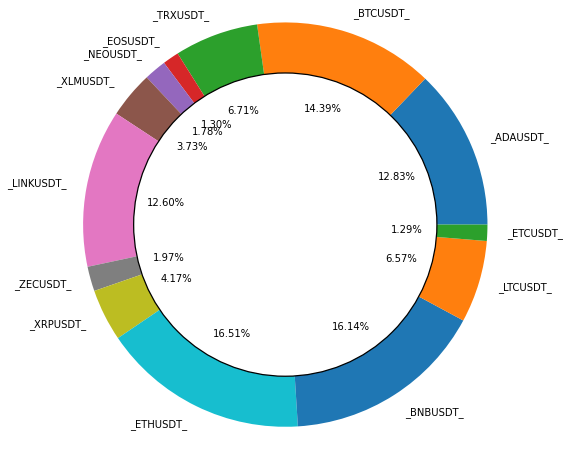

In [ ]:
#labels = port_list
weights1 = x1
#explode = (0,0,0,0,0,0,0,0,0,0,0)

plt.pie(weights1, labels=port_list, autopct='%.2f%%', shadow=False)
#Add a circle to give dougnut appearance 
circle = plt.Circle((0,0), 0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.axis('equal')
fig.set_size_inches(8,8)
plt.show()